In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models, layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test=y_test.reshape(-1,)
y_test.shape

(10000,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot(x, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

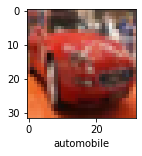

In [ ]:
plot(X_train, y_train, 5)

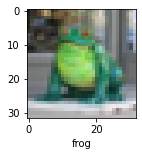

In [ ]:
plot(X_train,y_test, 19)

In [ ]:
# Normalization: Image has 3 channels(R,G,B) and each value in the channel can range from 0 to 255. Hence, to normalize to 0->1, it needs to be divided by 255

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
# Artificial Neural network for Image Classification

In [ ]:
ann = models.Sequential([
                layers.Flatten(input_shape = (32,32,3)),
                layers.Dense(3000, activation='relu'),
                layers.Dense(1000, activation='relu'),
                layers.Dense(10, activation = 'sigmoid')
                ])

In [ ]:
ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 8s 3ms/step - loss: 1.9380 - accuracy: 0.2994
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6419 - accuracy: 0.4214
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5581 - accuracy: 0.4509
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4919 - accuracy: 0.4737
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4355 - accuracy: 0.4962


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict = ann.predict(X_test)
y_prediction_classes = [np.argmax(element) for element in y_predict]

print("Classification report: \n", classification_report(y_test, y_prediction_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.49      0.48      0.49      1000
           1       0.66      0.44      0.53      1000
           2       0.49      0.14      0.21      1000
           3       0.31      0.39      0.34      1000
           4       0.56      0.26      0.35      1000
           5       0.42      0.34      0.38      1000
           6       0.48      0.61      0.54      1000
           7       0.49      0.61      0.54      1000
           8       0.34      0.86      0.49      1000
           9       0.67      0.32      0.43      1000

    accuracy                           0.44     10000
   macro avg       0.49      0.44      0.43     10000
weighted avg       0.49      0.44      0.43     10000



In [ ]:
# Convolution Neural Network to train images

In [ ]:
cnn = models.Sequential([
              layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (32,32,3)),
              layers.MaxPooling2D((2,2)),
              layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
              layers.MaxPooling2D((2, 2)), 
              layers.Flatten(),
              layers.Dense(64, activation='relu'),
              layers.Dense(10, activation='softmax')             
])

In [ ]:
cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train,y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.7375 - accuracy: 0.3703
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1883 - accuracy: 0.5833
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0281 - accuracy: 0.6422
Epoch 4/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.9374 - accuracy: 0.6734
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8615 - accuracy: 0.6983
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8067 - accuracy: 0.7176
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7702 - accuracy: 0.7292
Epoch 8/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7247 - accuracy: 0.7466
Epoch 9/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6973 - accuracy: 0.7547
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9122 - accuracy: 0.7015


[0.9121640920639038, 0.7014999985694885]

In [ ]:
y_prediction = cnn.predict(X_test)
y_prediction[:5]

array([[8.7173670e-05, 1.7303818e-04, 6.4631960e-05, 9.5016974e-01,
        3.7584009e-04, 4.5030851e-02, 1.5308695e-03, 1.0791559e-05,
        2.4477402e-03, 1.0928483e-04],
       [1.0085192e-01, 1.2327604e-02, 1.5823229e-04, 6.2220552e-06,
        9.8661831e-06, 2.0969378e-07, 4.1166101e-07, 1.8699207e-07,
        8.8380343e-01, 2.8419611e-03],
       [4.8523316e-01, 1.0400181e-01, 8.0020875e-03, 1.7881762e-02,
        3.0792921e-03, 2.4135779e-03, 3.5021298e-03, 8.3173048e-03,
        2.5581607e-01, 1.1175286e-01],
       [8.5869443e-01, 3.0641861e-03, 3.0363832e-02, 2.2512763e-03,
        1.0962619e-02, 1.8520822e-04, 4.7376016e-04, 7.3636784e-06,
        9.1655731e-02, 2.3415908e-03],
       [7.9474671e-07, 1.0792893e-05, 6.2024049e-03, 2.1442588e-01,
        4.4372651e-01, 2.6811464e-02, 3.0881077e-01, 6.7868655e-06,
        4.3987275e-06, 2.0251056e-07]], dtype=float32)

In [43]:
y_classes = [np.argmax(element) for element in y_predict]
y_classes[:5]

[3, 8, 8, 8, 4]

In [44]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

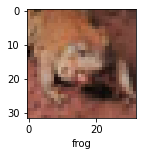

In [47]:
plot(X_test, y_test,5)

In [48]:
classes[y_classes[5]]

'frog'